In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Real_estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# 1. Dataset Loading & splitting:
# randomly pick 60% training data、40% test data

train_set = df.sample(frac=0.6, random_state = 50) # random_state用來固定同一組隨機數據
test_set  = df.drop(train_set.index)
display(train_set)
display(test_set)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
150,151,2013.250,35.8,170.7311,7,24.96719,121.54269,48.5
269,270,2013.000,17.6,837.7233,0,24.96334,121.54767,23.0
89,90,2013.500,23.0,3947.9450,0,24.94783,121.50243,25.3
403,404,2012.667,30.9,161.9420,9,24.98353,121.53966,39.7
115,116,2013.083,20.6,737.9161,2,24.98092,121.54739,46.4
...,...,...,...,...,...,...,...,...
316,317,2013.250,13.3,250.6310,7,24.96606,121.54297,42.0
345,346,2012.667,0.0,185.4296,0,24.97110,121.53170,37.9
259,260,2013.083,17.7,837.7233,0,24.96334,121.54767,28.8
149,150,2012.667,34.9,179.4538,8,24.97349,121.54245,39.7


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
...,...,...,...,...,...,...,...,...
406,407,2013.167,1.9,372.13860,7,24.97293,121.54026,40.5
408,409,2013.417,18.5,2175.74400,3,24.96330,121.51243,28.1
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


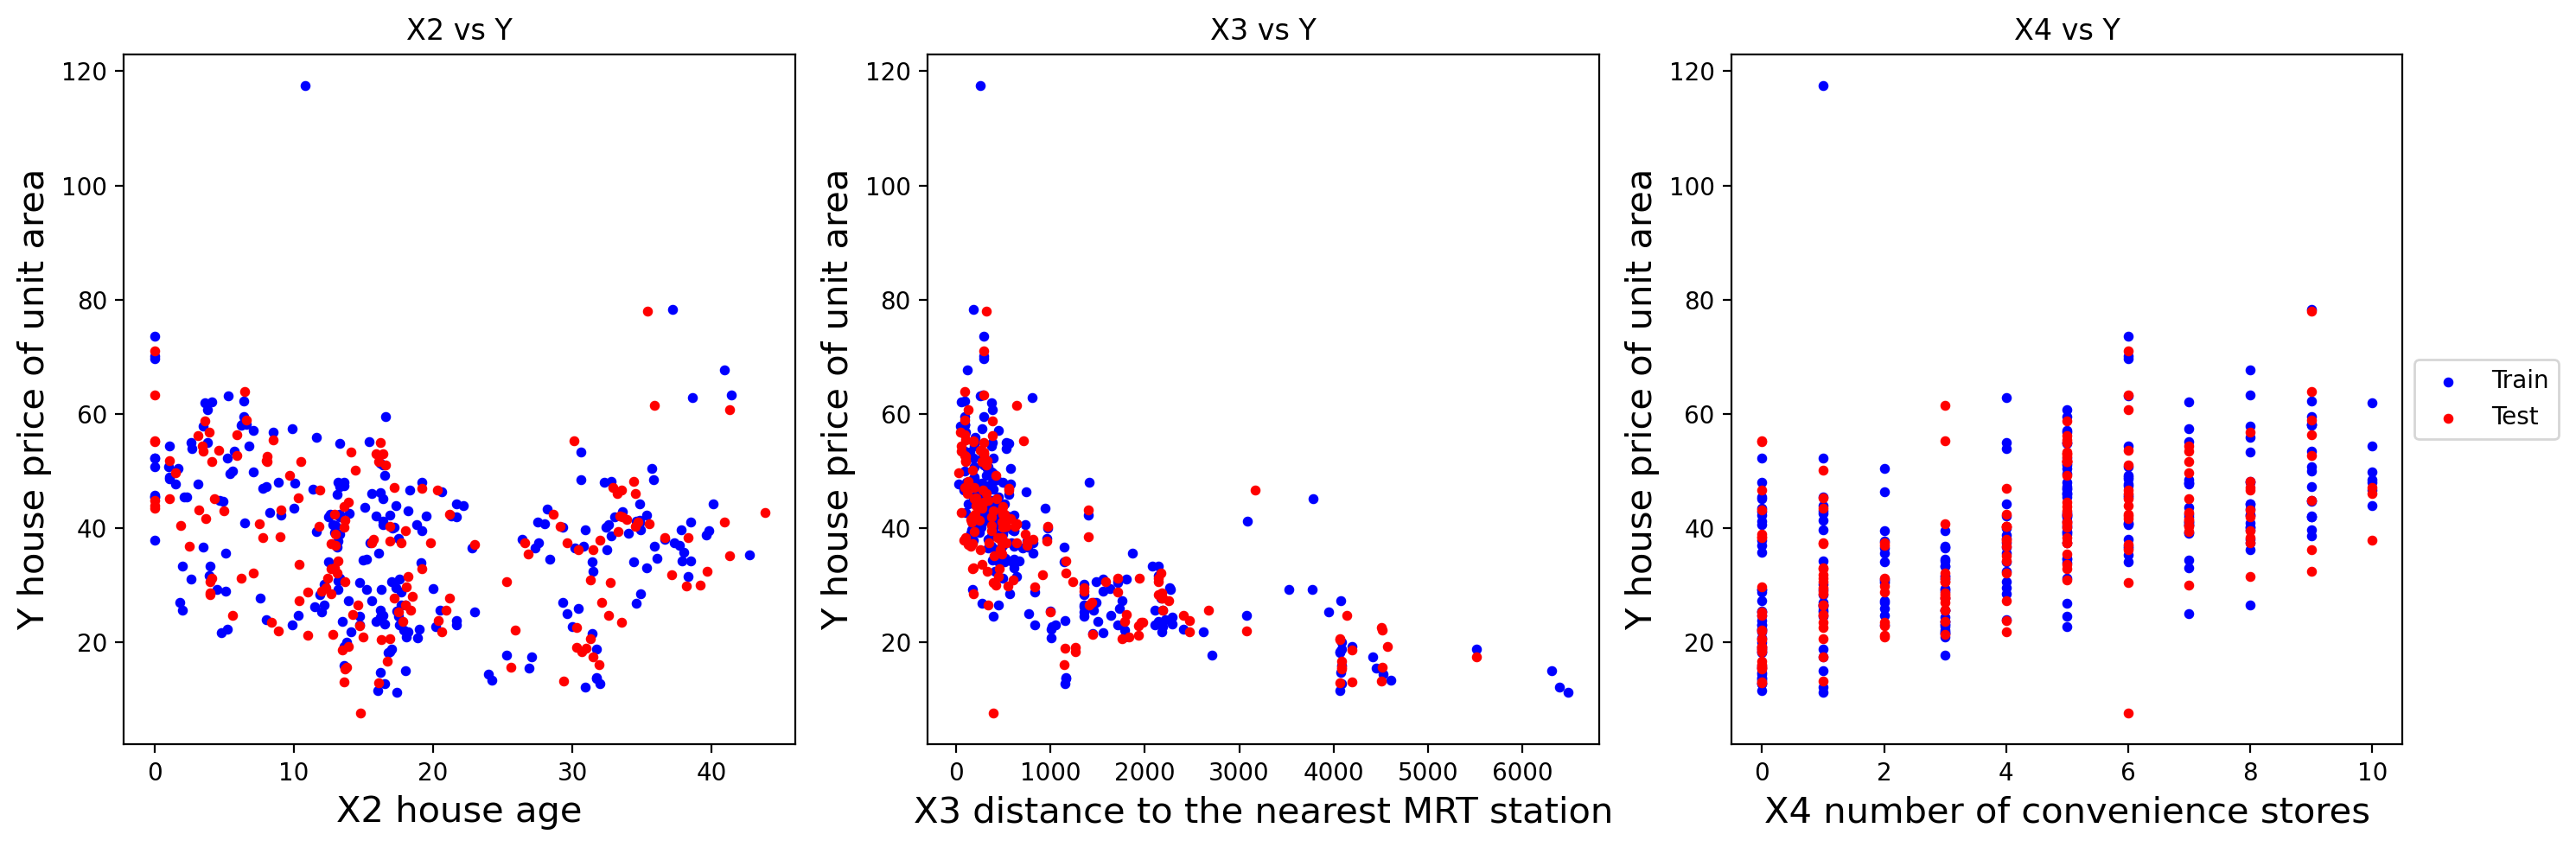

In [4]:
# 2. Plot scatter figure including training data and testing data:
# Consider [X2 house age], [X3 distance to the nearest MRT station] and 
# [X4 number of convenience stores] corresponding to Y house price of unit area
# Blue color as training data, Red color as testing data

plt.figure(figsize = (15,5), dpi=200)
for i in range (1, 4):
    plt.subplot(1, 3, i)
    plt.scatter(train_set.iloc[:,i+1].values, train_set.iloc[:,7].values, s=10, c='b')
    plt.scatter(test_set.iloc[:,i+1].values, test_set.iloc[:,7].values, s=10, c='r')
    plt.xlabel(df.columns[i+1], fontsize=15)
    plt.ylabel(df.columns[7], fontsize=15)
    plt.title(f'X{i+1} vs Y')
    if (i==3):
        plt.legend(['Train', 'Test'], loc='center left',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [5]:
# 3. Define loss function (Mean Square Error)
# Using basic mathematical operations in NumPy

def mse_loss(error):
    MSE = np.mean(np.square(error))
    return MSE

def error_func(predict, real):
    error = predict - real
    return error

def y_pred(X, beta):
    prediction = X.dot(beta)
    return prediction

# select specify column
def column_sel(df, line):
    return (df.iloc[:, line].values).reshape(-1,1)

In [6]:
def X_norm(X):
    num_samples, num_features = X.shape
    X_new = np.zeros((num_samples, num_features))
    for i in range(3):
        X_min  = min(X[:,i])
        X_max  = max(X[:,i])
        X_temp = (X[:,i] - X_min)/(X_max - X_min)
        X_new[:,i] = X_temp
    return X_new

In [ ]:
X234 = train_set.iloc[:, 2:5].values
new_x = X_norm(X234)
new_x = np.concatenate((np.ones((len(train_set), 1)), new_x), axis=1)
new_x = 

In [7]:
# 4. Using gradient method:

def beta_gen():
    beta = np.random.random_sample(size=(4,1))
    #print(beta)
    return beta

def gradient_descent(X_train, X_test, y_train, y_test, lrate, iters):
    num_samples, num_features = X_train.shape
    beta = beta_gen()
    mse_history_train = []
    mse_history_test  = []
    saved_beta  = []
    sigma = np.zeros((num_features, 1))
    
    for iteration in range(iters):
        # gain Y predictions
        y_pred_train = y_pred(X_train, beta) # Predictions
        y_pred_test  = y_pred(X_test, beta)  # Predictions
        
        # Error Function: gain Y prediction - Y real
        error_train  = error_func(y_pred_train, y_train) # Error
        error_test   = error_func(y_pred_test, y_test)   # Error
        
        # Gradient function
        gradients = (2 / num_samples) * X_train.T.dot(error_train) 
        
        # sigma to prevent learning rate diverge
        sigma += gradients**2
        beta  -= lrate/sigma * gradients 
        
        # calculate loss : Mean Square Error
        mse_train = mse_loss(error_train)
        mse_test  = mse_loss(error_test)
        
        # Append MSE to list
        mse_history_train.append(mse_train)
        mse_history_test.append(mse_test)
        
        if iteration % 50 == 0:
            saved_beta.append(beta.copy())
            
    return saved_beta, mse_history_train, mse_history_test

Training loss 1:
1 epoch training loss: 521009.6433
2 epoch training loss: 503396.6687
3 epoch training loss: 500729.7713
4 epoch training loss: 499166.3462
5 epoch training loss: 498056.3781
6 epoch training loss: 497195.2277
7 epoch training loss: 496491.5709
8 epoch training loss: 495896.6422
9 epoch training loss: 495381.3147
10 epoch training loss: 494926.7929

Testing loss 1:
1 epoch testing loss: 524751.1076
2 epoch testing loss: 506898.1025
3 epoch testing loss: 504188.1921
4 epoch testing loss: 502598.6392
5 epoch testing loss: 501469.6964
6 epoch testing loss: 500593.5754
7 epoch testing loss: 499877.5208
8 epoch testing loss: 499271.9923
9 epoch testing loss: 498747.3949
10 epoch testing loss: 498284.6280


array([[-6.83720935],
       [ 0.51159842],
       [ 0.43527082],
       [-3.61547062]])

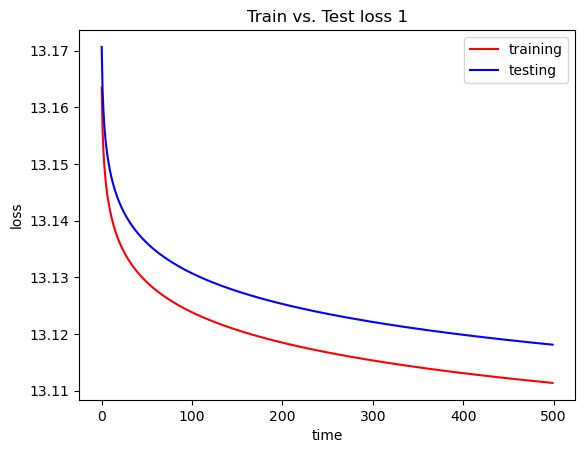

Training loss 2:
1 epoch training loss: 2686819.3341
2 epoch training loss: 2668889.1581
3 epoch training loss: 2666150.4733
4 epoch training loss: 2664543.5474
5 epoch training loss: 2663402.0573
6 epoch training loss: 2662516.0810
7 epoch training loss: 2661791.8951
8 epoch training loss: 2661179.4361
9 epoch training loss: 2660648.7937
10 epoch training loss: 2660180.6628

Testing loss 2:
1 epoch testing loss: 2704639.7706
2 epoch testing loss: 2686539.4471
3 epoch testing loss: 2683773.8014
4 epoch testing loss: 2682150.9382
5 epoch testing loss: 2680998.0738
6 epoch testing loss: 2680103.2388
7 epoch testing loss: 2679371.7918
8 epoch testing loss: 2678753.1781
9 epoch testing loss: 2678217.1928
10 epoch testing loss: 2677744.3403


array([[-2.66879272],
       [ 0.55004986],
       [ 0.99049993],
       [-0.62125022]])

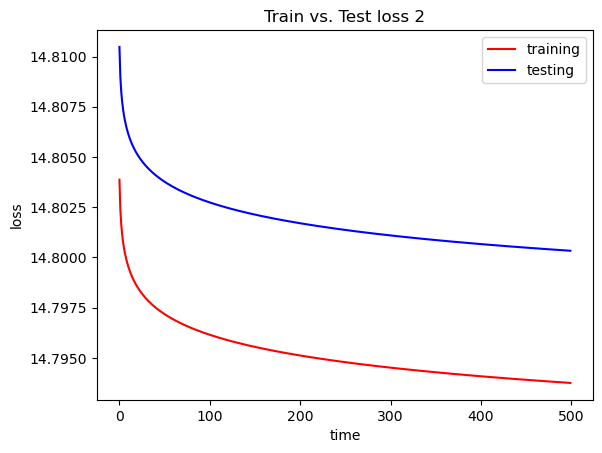

Training loss 3:
1 epoch training loss: 312412.4922
2 epoch training loss: 295209.6431
3 epoch training loss: 292650.8650
4 epoch training loss: 291156.5873
5 epoch training loss: 290098.5989
6 epoch training loss: 289279.5658
7 epoch training loss: 288611.5607
8 epoch training loss: 288047.6903
9 epoch training loss: 287559.9754
10 epoch training loss: 287130.3776

Testing loss 3:
1 epoch testing loss: 314376.8089
2 epoch testing loss: 296846.0957
3 epoch testing loss: 294221.4744
4 epoch testing loss: 292685.9895
5 epoch testing loss: 291597.4735
6 epoch testing loss: 290753.9846
7 epoch testing loss: 290065.4728
8 epoch testing loss: 289483.8830
9 epoch testing loss: 288980.5278
10 epoch testing loss: 288536.9041


array([[-9.6946916 ],
       [-0.45725895],
       [ 0.34190412],
       [-6.05354752]])

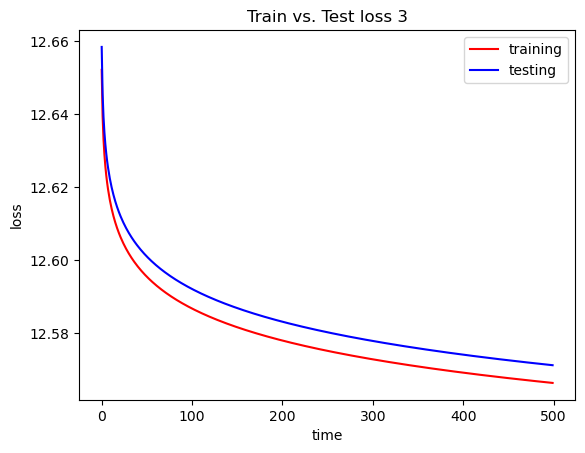

Training loss 4:
1 epoch training loss: 321152.2472
2 epoch training loss: 303860.5251
3 epoch training loss: 301276.3238
4 epoch training loss: 299765.3040
5 epoch training loss: 298694.4773
6 epoch training loss: 297864.8806
7 epoch training loss: 297187.8198
8 epoch training loss: 296615.9751
9 epoch training loss: 296121.1033
10 epoch training loss: 295684.9910

Testing loss 4:
1 epoch testing loss: 323359.8968
2 epoch testing loss: 305770.0800
3 epoch testing loss: 303127.1354
4 epoch testing loss: 301579.5654
5 epoch testing loss: 300481.7698
6 epoch testing loss: 299630.6364
7 epoch testing loss: 298935.5640
8 epoch testing loss: 298348.1908
9 epoch testing loss: 297839.6399
10 epoch testing loss: 297391.2823


array([[-9.69356115],
       [ 0.02947996],
       [ 0.34350842],
       [-5.28245686]])

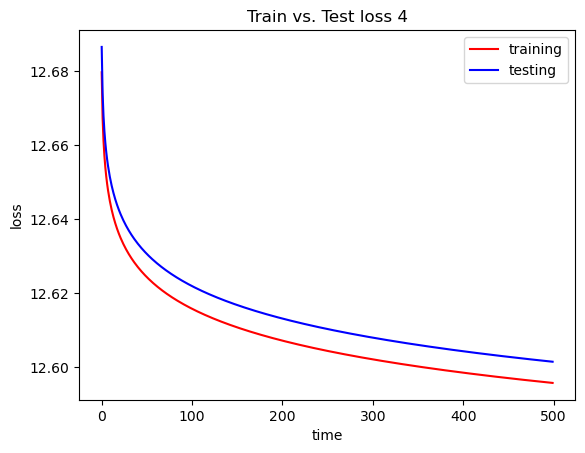

Training loss 5:
1 epoch training loss: 1555406.9723
2 epoch training loss: 1537527.4511
3 epoch training loss: 1534799.6475
4 epoch training loss: 1533199.2038
5 epoch training loss: 1532062.3582
6 epoch training loss: 1531180.0086
7 epoch training loss: 1530458.8010
8 epoch training loss: 1529848.8704
9 epoch training loss: 1529320.4257
10 epoch training loss: 1528854.2390

Testing loss 5:
1 epoch testing loss: 1566078.6908
2 epoch testing loss: 1548014.3487
3 epoch testing loss: 1545256.5757
4 epoch testing loss: 1543638.3294
5 epoch testing loss: 1542488.7387
6 epoch testing loss: 1541596.4400
7 epoch testing loss: 1540867.0628
8 epoch testing loss: 1540250.1969
9 epoch testing loss: 1539715.7240
10 epoch testing loss: 1539244.2040


array([[-3.25510379],
       [ 0.69527093],
       [ 0.75270966],
       [-1.54226185]])

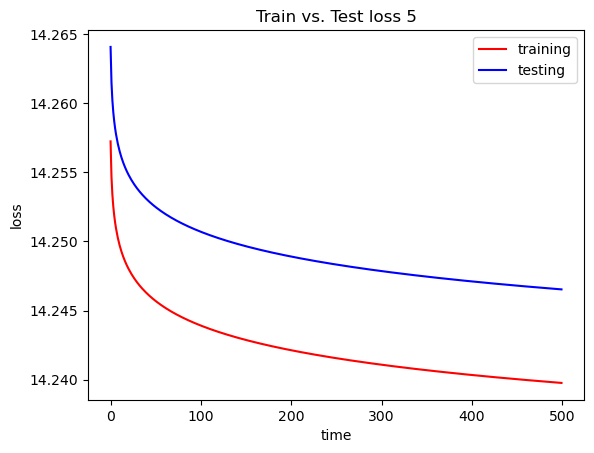

Training loss 6:
1 epoch training loss: 172198.4031
2 epoch training loss: 155679.3894
3 epoch training loss: 153339.2539
4 epoch training loss: 151996.0355
5 epoch training loss: 151057.8966
6 epoch training loss: 150340.1339
7 epoch training loss: 149760.8452
8 epoch training loss: 149276.5252
9 epoch training loss: 148861.3067
10 epoch training loss: 148498.5650

Testing loss 6:
1 epoch testing loss: 173418.0200
2 epoch testing loss: 156517.7851
3 epoch testing loss: 154087.3968
4 epoch testing loss: 152685.2014
5 epoch testing loss: 151702.1603
6 epoch testing loss: 150947.7242
7 epoch testing loss: 150337.2420
8 epoch testing loss: 149825.6798
9 epoch testing loss: 149386.2258
10 epoch testing loss: 149001.6281


array([[-13.48607385],
       [ -0.09780012],
       [  0.24942318],
       [ -7.65701609]])

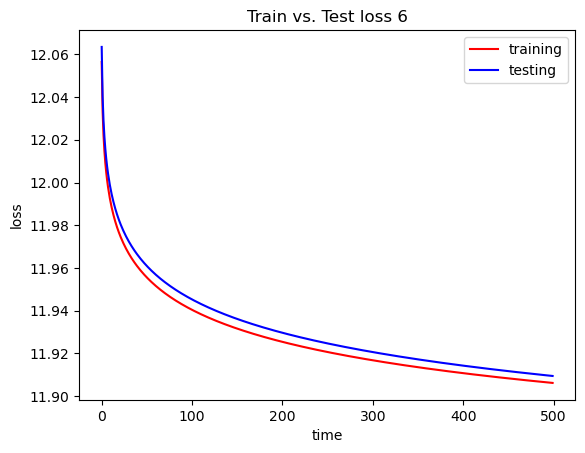

Training loss 7:
1 epoch training loss: 1440899.8624
2 epoch training loss: 1423036.1035
3 epoch training loss: 1420311.7367
4 epoch training loss: 1418713.3498
5 epoch training loss: 1417577.9823
6 epoch training loss: 1416696.7896
7 epoch training loss: 1415976.5337
8 epoch training loss: 1415367.4122
9 epoch training loss: 1414839.6718
10 epoch training loss: 1414374.1088

Testing loss 7:
1 epoch testing loss: 1450028.7896
2 epoch testing loss: 1431971.7890
3 epoch testing loss: 1429215.8946
4 epoch testing loss: 1427598.7546
5 epoch testing loss: 1426449.9503
6 epoch testing loss: 1425558.2618
7 epoch testing loss: 1424829.3833
8 epoch testing loss: 1424212.9388
9 epoch testing loss: 1423678.8309
10 epoch testing loss: 1423207.6328


array([[-4.34157935],
       [-0.16072961],
       [ 0.73040755],
       [-1.47610756]])

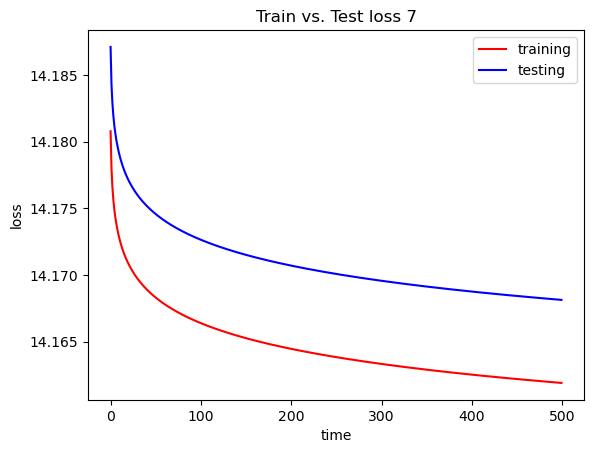

Training loss 8:
1 epoch training loss: 1053514.6316
2 epoch training loss: 1035700.2368
3 epoch training loss: 1032986.7468
4 epoch training loss: 1031394.8914
5 epoch training loss: 1030264.2281
6 epoch training loss: 1029386.7230
7 epoch training loss: 1028669.5049
8 epoch training loss: 1028062.9692
9 epoch training loss: 1027537.4814
10 epoch training loss: 1027073.9151

Testing loss 8:
1 epoch testing loss: 1060630.8398
2 epoch testing loss: 1042610.1203
3 epoch testing loss: 1039862.2992
4 epoch testing loss: 1038249.9354
5 epoch testing loss: 1037104.5374
6 epoch testing loss: 1036215.4996
7 epoch testing loss: 1035488.7916
8 epoch testing loss: 1034874.1857
9 epoch testing loss: 1034341.6725
10 epoch testing loss: 1033871.8828


array([[-4.68576597],
       [ 0.33106313],
       [ 0.62190441],
       [-2.42068918]])

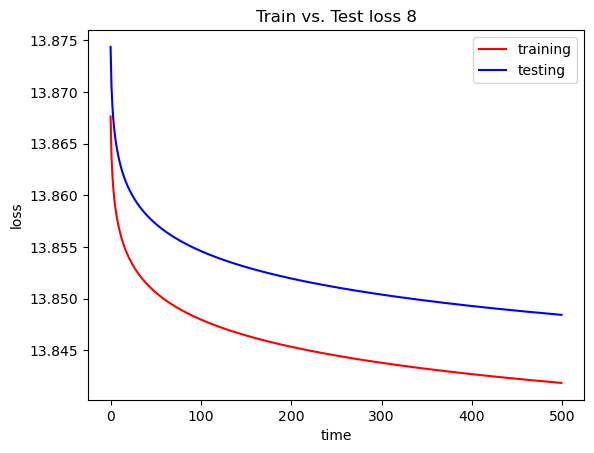

Training loss 9:
1 epoch training loss: 1471066.3964
2 epoch training loss: 1453197.8010
3 epoch training loss: 1450472.3774
4 epoch training loss: 1448873.3576
5 epoch training loss: 1447737.5352
6 epoch training loss: 1446855.9862
7 epoch training loss: 1446135.4371
8 epoch training loss: 1445526.0664
9 epoch training loss: 1444998.1089
10 epoch training loss: 1444532.3537

Testing loss 9:
1 epoch testing loss: 1480818.6374
2 epoch testing loss: 1462756.3164
3 epoch testing loss: 1459999.3661
4 epoch testing loss: 1458381.6036
5 epoch testing loss: 1457232.3562
6 epoch testing loss: 1456340.3235
7 epoch testing loss: 1455611.1632
8 epoch testing loss: 1454994.4805
9 epoch testing loss: 1454460.1659
10 epoch testing loss: 1453988.7854


array([[-4.05357349],
       [ 0.26485828],
       [ 0.73534668],
       [-1.90251238]])

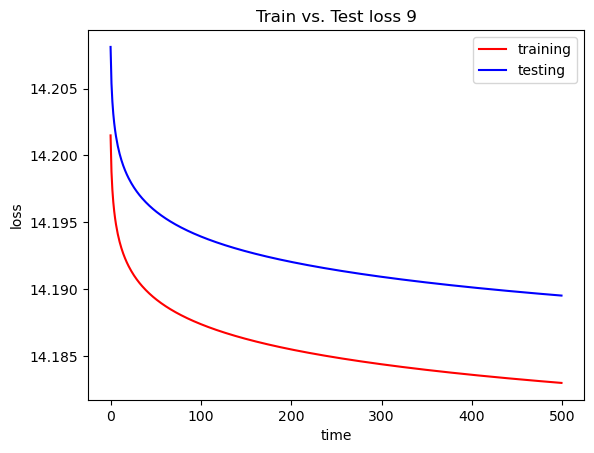

Training loss 10:
1 epoch training loss: 521787.3410
2 epoch training loss: 504171.1497
3 epoch training loss: 501503.4678
4 epoch training loss: 499939.5555
5 epoch training loss: 498829.2287
6 epoch training loss: 497967.7924
7 epoch training loss: 497263.8968
8 epoch training loss: 496668.7625
9 epoch training loss: 496153.2541
10 epoch training loss: 495698.5705

Testing loss 10:
1 epoch testing loss: 525552.9379
2 epoch testing loss: 507699.1019
3 epoch testing loss: 504988.8539
4 epoch testing loss: 503399.0891
5 epoch testing loss: 502269.9894
6 epoch testing loss: 501393.7428
7 epoch testing loss: 500677.5830
8 epoch testing loss: 500071.9637
9 epoch testing loss: 499547.2861
10 epoch testing loss: 499084.4474


array([[-7.14664056],
       [ 0.56787071],
       [ 0.43528467],
       [-3.51425188]])

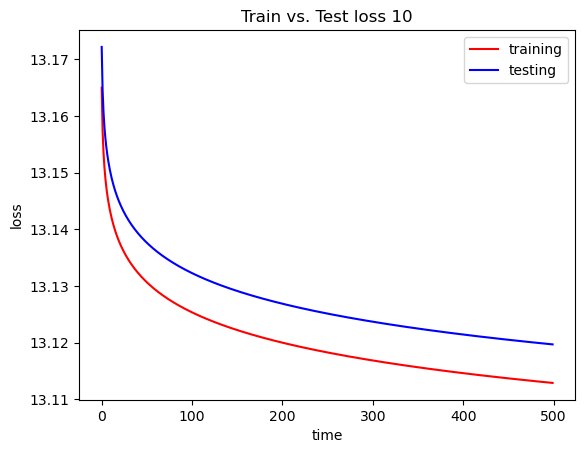

In [8]:
iteration = 500
lrate     = 1000

for j in range(10):
    X1  = np.ones((len(train_set), 1))
    X2  = column_sel(train_set, 2)
    X3  = column_sel(train_set, 3)
    X4  = column_sel(train_set, 4)

    X_train = np.concatenate((np.ones((len(train_set), 1)), train_set.iloc[:, 2:5].values), axis=1)
    Y_train = (train_set.iloc[:,7].values).reshape(-1,1)
    X_test  = np.concatenate((np.ones((len(test_set), 1)), test_set.iloc[:, 2:5].values), axis=1)
    Y_test  = (test_set.iloc[:,7].values).reshape(-1,1)

    saved_beta, mse_history_train, mse_history_test = gradient_descent(X_train, X_test, Y_train, Y_test, lrate, iteration)

    print(f'Training loss {j+1}:')
    for i in range(iteration):
        if (i%50==0):
            print(f'{int(i/50)+1} epoch training loss: {mse_history_train[i]:.4f}')  
    print(f'\nTesting loss {j+1}:')
    for i in range(iteration):
        if (i%50==0):
            print(f'{int(i/50)+1} epoch testing loss: {mse_history_test[i]:.4f}')

    display(saved_beta[-1])

    xxx = np.arange(0, len(mse_history_train))
    plt.figure()
    plt.plot((xxx),np.log(mse_history_train), color='red', label='training')
    plt.plot((xxx),np.log(mse_history_test), color='blue',  label='testing')
    plt.title(f'Train vs. Test loss {j+1}')
    plt.xlabel('time')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [ ]:
mu = []
sd = []
num_samples, num_features = X.shape
X_new = np.ones((num_samples, num_features))
for i in range(3):
    mu_temp = np.mean(X[:,i])
    mu.append(mu_temp)
    sd_temp = np.std(X[:,i])
    sd.append(sd_temp)
    X_temp = ((X[:,i])-mu_temp)/(sd_temp)


In [ ]:
beta = saved_beta[-1]
y_predict = y_pred(X_test, beta)

print('Y = β0 + β1*X2 + β2*X3 + β3*X4')

plt.figure(figsize=(5, 5))
plt.scatter(Y_test, y_predict)
xxx = np.arange(0, 90)
plt.plot(xxx, xxx, color='green', label='y = x')
plt.legend()
plt.xlabel('y_predict')
plt.ylabel('Y_test')
plt.title('predict y & true test y')
plt.show()

In [ ]:
# 5. Using least square method:

# calculate beta
def least_square(X, y):
    betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return betas

# calculate R^2
def R_square(y_pred, Y_test):
    mean_actual = np.mean(Y_test)
    ss_total    = np.sum((Y_test - mean_actual) ** 2)
    ss_residual = np.sum((Y_test - y_pred) ** 2)
    R2          = 1 - (ss_residual / ss_total)
    return R2

# gain beta, y_predict, R2 in one function
def beta_Ypred_R2(X, X_test, y, y_test):
    beta      = least_square(X, y)
    # train
    y_predict = y_pred(X, beta)
    error     = error_func(y_predict, y)
    MSE       = mse_loss(error)
    # test
    y_predict_1 = y_pred(X_test, beta)
    error_1     = error_func(y_predict_1, y_test)
    MSE_1       = mse_loss(error_1)
    
    R2        = R_square(y_predict, y)
    return beta, MSE, MSE_1, y_predict, R2

In [ ]:
# prepare training data set for
# 1. Y = β0' + β1'*X2  + β2'*X3  + β3'*X4
# 2. Y = β4  + β5 *X2  + β6 *X22 + β7 *X3  + β8 *X4
# 3. Y = β9  + β10*X2  + β11*X 3 + β12*X33 + β13*X4

X1  = np.ones((len(train_set), 1))
X2  = column_sel(train_set, 2)
X3  = column_sel(train_set, 3)
X4  = column_sel(train_set, 4)
X22 = X2**2
X33 = X3**2

X_train1 = np.concatenate((X1, X2, X3, X4), axis=1)
X_train2 = np.concatenate((X1, X2, X22, X3, X4), axis=1)
X_train3 = np.concatenate((X1, X2, X3, X33, X4), axis=1)

#print(f'{X_train1.shape}, {X_train2.shape}, {X_train3.shape}')

X1_test  = np.ones((len(test_set), 1))
X2_test  = column_sel(test_set, 2)
X3_test  = column_sel(test_set, 3)
X4_test  = column_sel(test_set, 4)
X22_test = X2_test**2
X33_test = X3_test**2

X_test1 = np.concatenate((X1_test, X2_test, X3_test, X4_test), axis=1)
X_test2 = np.concatenate((X1_test, X2_test, X22_test, X3_test, X4_test), axis=1)
X_test3 = np.concatenate((X1_test, X2_test, X3_test, X33_test, X4_test), axis=1)

#print(f'{X_train1.shape}, {X_train2.shape}, {X_train3.shape}')

In [ ]:
beta1, Train_loss1, Test_loss1, y_pred_1, R2_1 = beta_Ypred_R2(X_train1, X_test1, Y_train, Y_test)
beta2, Train_loss2, Test_loss2, y_pred_2, R2_2 = beta_Ypred_R2(X_train2, X_test2, Y_train, Y_test)
beta3, Train_loss3, Test_loss3, y_pred_3, R2_3 = beta_Ypred_R2(X_train3, X_test3, Y_train, Y_test)

#y_pred_1 = y_pred(X_train1, beta_1)

print('Least Square Method\n')
print(f'Model 1:\nbetas: {beta1.T},\nTrain loss: {Train_loss1:.4f}, Test loss: {Test_loss1:.4f}, R Square: {R2_1:.4f}\n')
print(f'Model 2:\nbetas: {beta2.T},\nTrain loss: {Train_loss2:.4f}, Test loss: {Test_loss2:.4f}, R Square: {R2_2:.4f}\n')
print(f'Model 3:\nbetas: {beta3.T},\nTrain loss: {Train_loss3:.4f}, Test loss: {Test_loss3:.4f}, R Square: {R2_3:.4f}')

In [ ]:
import statsmodels.api as sm
model_time1 = sm.OLS(Y_train, X_train3)
results_time1 = model_time1.fit()
print(results_time1.summary())

In [ ]:
def get_xxx(X_test, X_type):
    xxx = np.arange(0.8*min(X_test[:,X_type]), max(1.15*X_test[:,X_type]))
    #print(xxx.shape)
    return xxx

def fitting_line(xxx, yyy, X_type, X_train, Y_train, X_test, Y_test):
    plt.scatter(X_train[:,X_type], Y_train, s=10, c='b', marker='o', label='training data')
    plt.scatter(X_test[:,X_type], Y_test, s=10, c='r', marker='o', label='testing data')
    plt.plot(xxx, yyy, color='green',  label='model')
    plt.title(f'X{X_type+1} vs. Y')
    plt.xlabel(df.columns[X_type+1])
    plt.ylabel(df.columns[7])
    plt.legend()
    
mu = []
for i in range(4):
    mu_temp = np.mean(X_train[:,i])
    mu.append(mu_temp)
print(mu)

def y_func_1(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*mu[2] + beta[3]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*xxx + beta[3]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*mu[2] + beta[3]*xxx
    return yyy

def y_func_2(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*(xxx**2) + beta[3]*mu[2] + beta[4]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*(mu[1]**2) + beta[3]*xxx + beta[4]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*(mu[1]**2) + beta[3]*mu[2] + beta[4]*xxx
    return yyy

def y_func_3(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*mu[2] + beta[3]*(mu[2]**2) + beta[4]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*xxx + beta[3]*(xxx**2) + beta[4]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*mu[2] + beta[3]*(mu[1]**2) + beta[4]*xxx
    return yyy

In [ ]:
plt.figure()
xxx = get_xxx(X_test, 1)
yyy = y_func_1(xxx, 1, beta_1)
fitting_line(xxx, yyy, 1, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 2)
yyy = y_func_1(xxx, 2, beta_1)
fitting_line(xxx, yyy, 2, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 3)
yyy = y_func_1(xxx, 3, beta_1)
fitting_line(xxx, yyy, 3, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 1)
yyy = y_func_2(xxx, 1, beta_2)
fitting_line(xxx, yyy, 1, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 2)
yyy = y_func_2(xxx, 2, beta_2)
fitting_line(xxx, yyy, 2, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 3)
yyy = y_func_2(xxx, 3, beta_2)
fitting_line(xxx, yyy, 3, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 1)
yyy = y_func_3(xxx, 1, beta_3)
fitting_line(xxx, yyy, 1, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 2)
yyy = y_func_3(xxx, 2, beta_3)
fitting_line(xxx, yyy, 2, X_train, Y_train, X_test, Y_test)
plt.show()

plt.figure()
xxx = get_xxx(X_test, 3)
yyy = y_func_3(xxx, 3, beta_3)
fitting_line(xxx, yyy, 3, X_train, Y_train, X_test, Y_test)
plt.show()

In [ ]:
def fitting_line():
    plt.subplot(8,8,i*8+j+1)
    xxx = np.arange(min(X_test[:,]), max(X_test[:,1]))
    for i in range()
    yyy = beta_1[0] + beta_1[1]*xxx + beta_1[2] + beta_1[3]
    plt.scatter(X_train[:,1], Y_train, s=10, c='r', marker='o', label='training data')
    plt.scatter(X_test[:,1], Y_test, s=10, c='b', marker='o', label='testing data')
    plt.plot(xxx, yyy, color='green',  label='model')
    plt.title('X2 house age vs Y')
    plt.legend()
    
plt.figure()

b = np.arange(min(X_test[:,1]), max(X_test[:,1]))
a = np.zeros((b.shape[0], 5))
a

plt.subplot(8,8,i*8+j+1)

In [ ]:
X_train = train_set.iloc[:,2:5]
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # add Intercept term
Y_trian = train_set.iloc[:, 7]

beta      = gradient_decent(X_train, Y_trian)
Y_predict = Y_pred(beta, X_train)
mse       = loss_func(Y_trian, Y_predict)
mse

In [ ]:
def gradient_descent(X_train, X_test, Y_train, Y_test, iters):
    num_samples, num_features = X_train.shape
    lrate         = 0.01*np.ones([num_features, 1])
    beta          = np.zeros([num_features, 1])
    beta_history  = [beta]
    train_losses  = []
    test_losses   = []
    
    for i in range(iters):
        Y_predict_train = Y_pred(beta_history[-1], X_train)                        # get y prediction
        Y_predict_test  = Y_pred(beta, X_test)
        #print(Y_predict_train.shape)
        gradient        = grad_func(X_train, Y_train, Y_predict_train) # using y prediction to get gradient
        beta_temp       = beta_func(beta, lrate, gradient)
        beta_history.append(beta_temp)
        #print(beta)
        if (i%50 == 0):
            #print(i)
            train_loss = mse_loss(Y_train, Y_predict_train)
            test_loss  = mse_loss(Y_test, Y_predict_test)
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            
    return train_losses, val_losses

In [ ]:
# 5. Using least square method:

In [ ]:
def y_func_1(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*mu[2] + beta[3]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*xxx + beta[3]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*mu[2] + beta[3]*xxx
    return yyy

def y_func_2(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*(xxx**2) + beta[3]*mu[2] + beta[4]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*(mu[1]**2) + beta[3]*xxx + beta[4]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*(mu[1]**2) + beta[3]*mu[2] + beta[4]*xxx
    return yyy

def y_func_3(xxx, X_type, beta):
    if (X_type==1):
        yyy = beta[0] + beta[1]*xxx + beta[2]*mu[2] + beta[3]*(mu[2]**2) + beta[4]*mu[3]
    elif (X_type==2):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*xxx + beta[3]*(xxx**2) + beta[4]*mu[3]
    elif (X_type==3):
        yyy = beta[0] + beta[1]*mu[1] + beta[2]*mu[2] + beta[3]*(mu[1]**2) + beta[4]*xxx
    return yyy

In [ ]:
def Y_pred(beta, X_train):
    Y = beta[0] + beta[1]*X_train[:,0] + beta[2]*X_train[:,1] + beta[3]*X_train[:,2]
    return Y

In [ ]:
def least_square(X_train, y_train):
    beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    return beta

In [ ]:
def mse_loss(Y_real, Y_predict):
    Y_diff = (Y_real - Y_predict)**2
    MSE    = Y_diff.mean
    return MSE

def lrate_improve(gradients):
    summation = 0
    for data in gradients: # summing the square
        summation = summation + data**2
    sigma = (summation/len(gradients))**0.5
    return sigma

def beta_func(beta, lrate, sigma, gradient):
    beta_new = beta - lrate/sigma*gradient
    return beta_new

def grad_func(X, Y, Y_pred):
    grad = ((Y_pred - Y).T.dot(X))/len(Y)
    return grad

In [ ]:
def Y_pred(beta, X):
    Y = beta[0]*X[:,0] + beta[1]*X[:,1] + beta[2]*X[:,2] + beta[3]*X[:,3]
    return Y

def gradient_descent(X_train, X_test, Y_train, Y_test, beta, iters):
    lrate         = np.ones((len(beta), 1))
    lr_cumulative = np.zeros((len(beta), 1))
    beta_history  = [beta]
    gradients     = []#
    train_losses  = []
    test_losses   = []
    
    for i in range(iters):
        Y_predict_train = Y_pred(beta, X_train)
        gradient      = grad_func(X_train, Y_train, Y_predict_train)
        gradients.append(gradient)
        sigma = lrate_improve(gradients)
        beta_tmp = beta_func(beta_history[-1], lrate, sigma, gradient)
        beta_history.append(beta_tmp)
        
        if (i%50 == 0):
            Y_predict_train = Y_pred(beta, X_train)
            Y_predict_test  = Y_pred(beta, X_test)
            train_loss = mse_loss(Y_train, Y_predict_train)
            test_loss  = mse_loss(Y_test, Y_predict_test)
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            
    return beta_history, train_losses, test_losses

In [ ]:
# first try of fix lrate

def gradient_descent(X, y, lrate, iters):
    num_samples, num_features = X.shape
    beta = np.zeros((num_features, 1)) # Initialize weights
    mse_history = []
    saved_beta  = []
    for iteration in range(iters):
        y_pred    = X.dot(beta) # Predictions
        error     = y_pred - y  # Error
        gradients = (2 / num_samples) * X.T.dot(error)
        beta  -= lrate * gradients
        mse    = np.mean(np.square(error))
        mse_history.append(mse)
        if iteration % 50 == 0:
            print(mse)
            saved_beta.append(beta.copy())
    return saved_beta, mse_history

In [ ]:
def gradient_descent(X, y, lrate, iters):
    num_samples, num_features = X.shape
    beta = np.zeros((num_features, 1)) # Initialize weights
    mse_history = []
    saved_beta  = []
    sigma = np.zeros((num_features, 1))
    
    for iteration in range(iters):
        y_pred    = X.dot(beta) # Predictions
        error     = y_pred - y  # Error
        gradients = (2 / num_samples) * X.T.dot(error) # gradient function
        sigma += gradients**2   # aims to prevent learning rate diverge
        beta  -= lrate/sigma * gradients # calculate beta
        mse    = mse_loss(error)
        mse_history.append(mse)
        if iteration % 50 == 0:
            print(f'Mean Square error of {int(iteration/50)} epoch: {mse}')
            saved_beta.append(beta.copy())
    return saved_beta, mse_history

* Mean Square error of 0 epoch: 1689.174556451613
* Mean Square error of 1 epoch: 110.51276695579749
* Mean Square error of 2 epoch: 95.39782075203422
* Mean Square error of 3 epoch: 93.4947340351135
* Mean Square error of 4 epoch: 93.25304908493571
* Mean Square error of 5 epoch: 93.2223241385027
* Mean Square error of 6 epoch: 93.2184176201401
* Mean Square error of 7 epoch: 93.21792091817414
* Mean Square error of 8 epoch: 93.21785776389062
* Mean Square error of 9 epoch: 93.21784973399565